In [ ]:
# dataset 1: likely included feature engineering beforehand
# dimensionality reduction techniques: PCA, TSNE, UMAP
# training & testing: LSVC, kNN, NB, RF, DT, SVM
# cross-validation: Leave-One-Out, Shuffle Split

In [ ]:
# installing req packages and libraries

In [ ]:
!pip install lmfit
!pip install umap-learn
!pip install tpot

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lmfit import Model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import umap
from tpot import TPOTClassifier
import warnings

warnings.filterwarnings('ignore')
sns.set_theme()
pl.rc('font',family='Arial')

In [58]:
# reading the data from the csv files
# 2 files: data and labels

data = pd.read_csv("dataOG.csv", header=0, index_col=0)
labels = pd.read_csv("labels.csv")

In [36]:
# removes first column of data; they are all 0s, so is redundant
X = data.drop(data.columns[0],axis=1)
# contains target values: the Class of cancer
Y = labels.Class

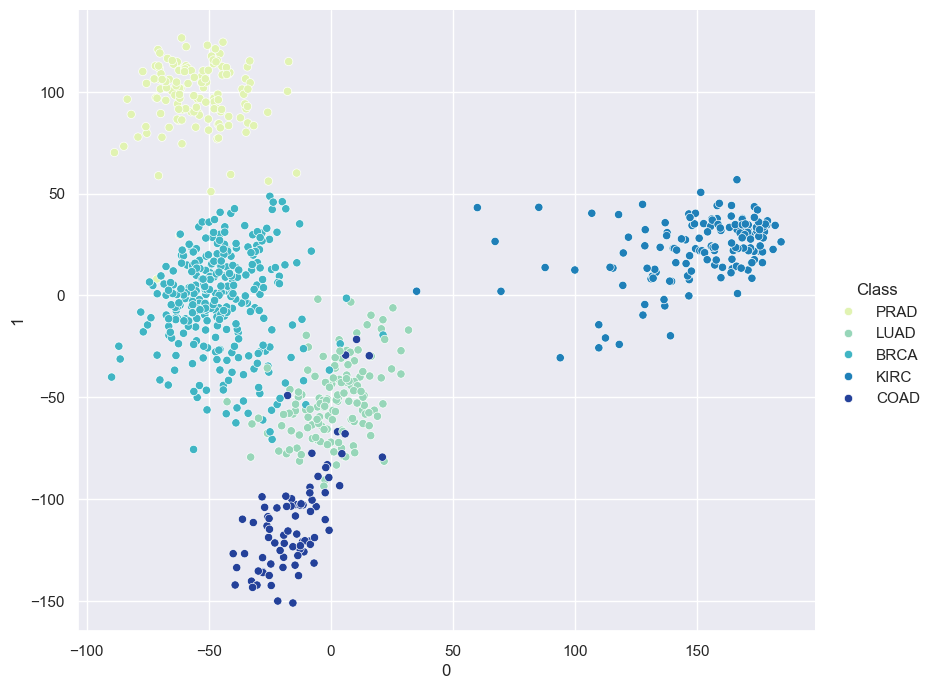

In [37]:
# plotting a graph using principle component analysis
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
X_pca = pd.DataFrame(data = principalComponents)
X_pca = pd.concat([X_pca.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

sns.pairplot(x_vars=0, y_vars=1, data=X_pca, hue="Class",palette="YlGnBu",size=7,aspect=1.2)
pl.show()

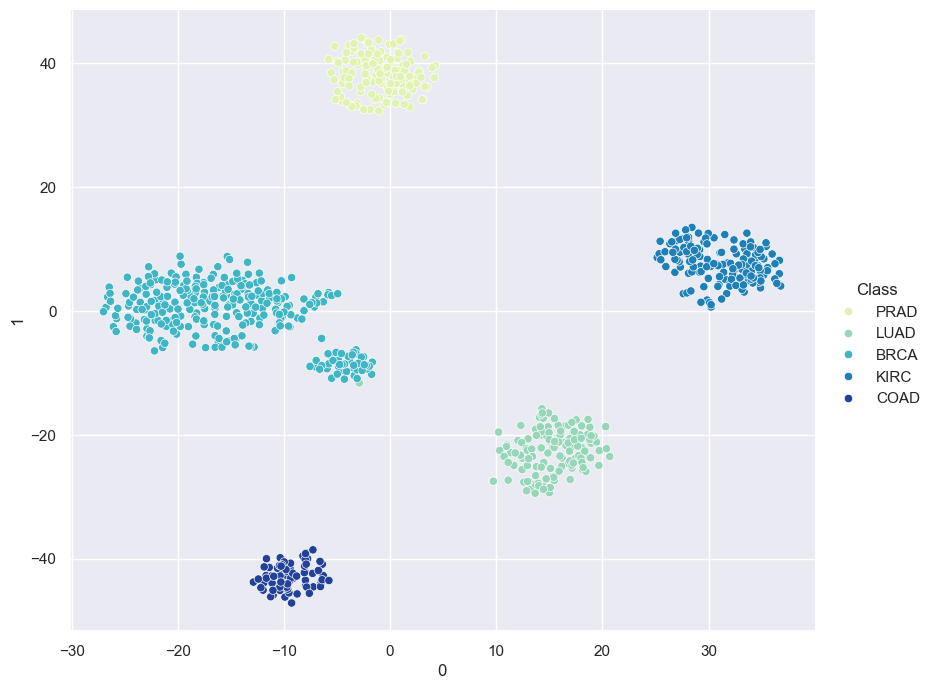

In [27]:
# plotting a graph using t-distributed Stochastic Neighbor Embedding
X_tsne = TSNE(n_components=2).fit_transform(X)
X_tsne = pd.DataFrame(data = X_tsne)
X_tsne = pd.concat([X_tsne.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

sns.pairplot(x_vars=0, y_vars=1, data=X_tsne, hue="Class",palette="YlGnBu",size=7,aspect=1.2)
pl.show()

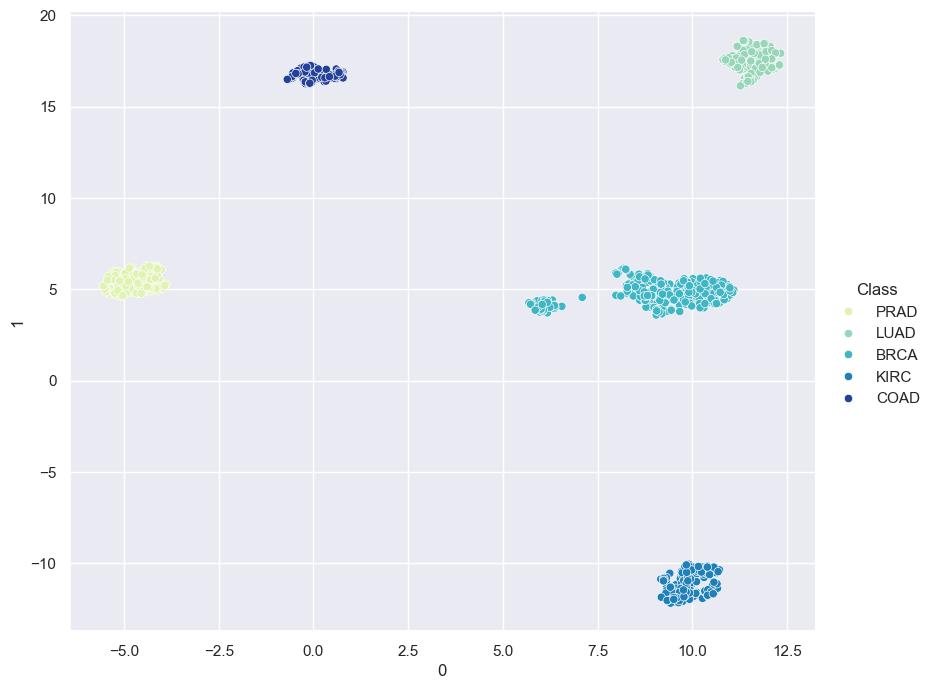

In [28]:
# plotting a graph using Uniform Manifold Approximation and Projection

X_umap = umap.UMAP().fit_transform(X)
X_umap = pd.DataFrame(data=X_umap)
X_umap = pd.concat([X_umap.reset_index().drop(['index'],axis=1),Y.reset_index().drop(['index'],axis=1)], axis=1)

sns.pairplot(x_vars=0, y_vars=1, data=X_umap, hue="Class",palette="YlGnBu",size=7,aspect=1.2)
pl.show()

In [74]:
X = X_umap.drop(['Class'],axis=1)
Y = X_umap['Class']

#75% data for training, 25% for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 10)

In [75]:
# linear support vector classifier

# testing - train score: accuracy on train data
# test score: accuracy on test data
lsvc_model = SVC(kernel = 'linear', random_state = 10)
lsvc_model.fit(X_train, Y_train) 
Y_pred = lsvc_model.predict(X_test)

print('train score: '+str(lsvc_model.score(X_train,Y_train)))
print('test score:  '+str(lsvc_model.score(X_test,Y_test)))

train score: 0.9983333333333333
test score:  1.0


In [88]:
# random forest

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=10)
rf_model.fit(X_train, Y_train)
    
Y_pred = rf_model.predict(X_test)

print('train score: ' + str(rf_model.score(X_train, Y_train)))
print('test score:  ' + str(rf_model.score(X_test, Y_test)))

train score: 1.0
test score:  1.0


In [90]:
# k-Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)

Y_pred = knn_model.predict(X_test)

print('train score: ' + str(knn_model.score(X_train, Y_train)))
print('test score:  ' + str(knn_model.score(X_test, Y_test)))


train score: 0.9983333333333333
test score:  1.0


In [92]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

Y_pred = nb_model.predict(X_test)

print('train score: ' + str(nb_model.score(X_train, Y_train)))
print('test score:  ' + str(nb_model.score(X_test, Y_test)))

train score: 0.9983333333333333
test score:  1.0


In [100]:
# Support Vector Machines
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')  # You can change the kernel type (linear, rbf, poly) as needed
svm_model.fit(X_train, Y_train)

Y_pred = svm_model.predict(X_test)

print('train score: ' + str(svm_model.score(X_train, Y_train)))
print('test score:  ' + str(svm_model.score(X_test, Y_test)))


train score: 0.9983333333333333
test score:  1.0


In [120]:
# Leave-One-Out ML Cross Validation, using DTs
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut, cross_val_score

clf = DecisionTreeClassifier(random_state=42)
loo = LeaveOneOut()

scores = cross_val_score(clf, X, Y, cv = loo)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Average CV Score:  0.94
Number of CV Scores used in Average:  150


In [122]:
# Shuffle Split Cross Validation, using DTs

from sklearn.model_selection import ShuffleSplit, cross_val_score

clf = DecisionTreeClassifier(random_state=42)

ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits = 150)

scores = cross_val_score(clf, X, Y, cv = ss)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.95555556 0.97777778 0.93333333 0.95555556 0.97777778 0.91111111
 0.86666667 0.95555556 0.93333333 0.93333333 0.88888889 0.93333333
 0.93333333 0.95555556 0.93333333 0.95555556 0.95555556 0.95555556
 0.93333333 0.97777778 0.93333333 0.97777778 0.95555556 0.95555556
 0.91111111 0.93333333 0.97777778 0.93333333 0.93333333 0.95555556
 0.95555556 0.91111111 0.93333333 0.97777778 0.91111111 1.
 0.93333333 0.93333333 0.91111111 0.93333333 0.93333333 0.93333333
 0.95555556 0.91111111 0.93333333 0.91111111 0.93333333 0.97777778
 0.88888889 0.95555556 0.97777778 0.93333333 0.91111111 0.91111111
 0.93333333 0.88888889 0.95555556 0.93333333 0.93333333 0.93333333
 0.93333333 0.97777778 0.95555556 0.97777778 0.93333333 0.95555556
 0.95555556 0.91111111 0.95555556 0.88888889 0.91111111 0.91111111
 0.95555556 0.95555556 0.95555556 0.88888889 0.95555556 0.93333333
 0.97777778 0.95555556 0.97777778 0.93333333 0.97777778 0.97777778
 0.95555556 0.93333333 0.95555556 0.86666667

In [103]:
# Leave-One-Out ML Cross Validation, using SVMs
clf = SVC(kernel='linear', random_state=42)  # Change kernel as needed

# Initialize LeaveOneOut cross-validator
loo = LeaveOneOut()

# Perform cross-validation and get scores
scores = cross_val_score(clf, X, Y, cv=loo)

# Output the results
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Average CV Score:  0.98
Number of CV Scores used in Average:  150


In [106]:
# Leave-One-Out ML Cross Validation, using kNN

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()

# Initialize LeaveOneOut cross-validator
loo = LeaveOneOut()

# Perform cross-validation and get scores
scores = cross_val_score(clf, X, Y, cv=loo)

# Output the results
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Average CV Score:  0.9666666666666667
Number of CV Scores used in Average:  150


In [117]:
# Shuffle Split Cross Validation using kNN

clf = KNeighborsClassifier(n_neighbors=5)

ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits=150)

scores = cross_val_score(clf, X, Y, cv=ss)

# Output the results
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [0.97777778 1.         0.97777778 0.95555556 1.         0.97777778
 0.97777778 1.         0.97777778 0.97777778 0.97777778 0.97777778
 0.97777778 1.         0.93333333 0.93333333 0.95555556 0.97777778
 0.91111111 0.97777778 0.95555556 0.95555556 0.91111111 1.
 0.97777778 0.93333333 0.97777778 0.97777778 0.93333333 0.97777778
 0.97777778 0.95555556 0.97777778 0.95555556 1.         0.95555556
 0.95555556 1.         0.93333333 0.95555556 0.93333333 0.91111111
 0.97777778 0.97777778 0.97777778 0.97777778 0.97777778 0.95555556
 0.93333333 0.97777778 0.93333333 0.93333333 0.95555556 0.97777778
 0.95555556 0.97777778 0.97777778 0.95555556 0.88888889 0.93333333
 0.97777778 1.         0.97777778 0.97777778 0.97777778 0.97777778
 0.95555556 0.97777778 1.         0.97777778 0.93333333 0.97777778
 0.95555556 0.93333333 0.95555556 0.95555556 0.97777778 0.91111111
 0.97777778 0.93333333 0.97777778 0.95555556 0.95555556 0.97777778
 1.         0.97777778 0.95555556 0.97777778

In [113]:
# Leave-One-Out ML Cross Validation, using Naive Bayes

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

# Initialize LeaveOneOut cross-validator
loo = LeaveOneOut()

# Perform cross-validation and get scores
scores = cross_val_score(clf, X, Y, cv=loo)

# Output the results
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Average CV Score:  0.9533333333333334
Number of CV Scores used in Average:  150


In [118]:
# Shuffle Split Cross Validation using RFs

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits=150)

scores = cross_val_score(clf, X, Y, cv=ss)

# Output the results
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [0.97777778 0.93333333 0.95555556 0.97777778 0.86666667 1.
 0.95555556 0.93333333 0.91111111 1.         0.91111111 0.91111111
 0.86666667 0.91111111 0.93333333 0.95555556 0.95555556 0.95555556
 0.91111111 0.93333333 0.95555556 0.95555556 0.95555556 0.86666667
 0.97777778 0.97777778 0.97777778 1.         0.95555556 0.93333333
 0.97777778 0.95555556 0.95555556 0.88888889 0.97777778 0.95555556
 0.95555556 0.97777778 0.97777778 0.95555556 0.95555556 1.
 0.93333333 0.95555556 0.97777778 0.95555556 0.95555556 0.95555556
 0.91111111 0.88888889 0.97777778 0.95555556 0.97777778 0.95555556
 0.91111111 0.95555556 0.95555556 0.93333333 0.97777778 0.93333333
 0.91111111 0.97777778 0.95555556 0.95555556 0.97777778 0.97777778
 0.95555556 0.95555556 0.93333333 0.91111111 0.97777778 0.93333333
 0.95555556 0.93333333 0.93333333 0.95555556 0.91111111 0.95555556
 0.97777778 0.95555556 0.97777778 0.95555556 0.88888889 0.95555556
 0.93333333 0.95555556 0.93333333 0.88888889 0.95555

In [125]:
# Shuffle Split Cross Validation using NBs
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

# Initialize LeaveOneOut cross-validator
ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits=150)

# Perform cross-validation and get scores
scores = cross_val_score(clf, X, Y, cv=ss)

# Output the results
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [0.93333333 0.95555556 0.93333333 0.93333333 0.95555556 0.95555556
 0.97777778 0.86666667 0.97777778 0.95555556 0.93333333 0.93333333
 0.91111111 0.93333333 0.97777778 0.97777778 0.95555556 0.93333333
 1.         0.91111111 0.93333333 0.91111111 0.95555556 0.93333333
 0.95555556 0.91111111 0.95555556 0.93333333 0.86666667 0.95555556
 0.93333333 0.91111111 0.93333333 0.93333333 0.95555556 0.95555556
 0.95555556 0.97777778 0.93333333 0.95555556 0.91111111 0.95555556
 0.97777778 0.97777778 0.93333333 0.93333333 0.95555556 0.95555556
 0.88888889 1.         0.93333333 0.95555556 0.95555556 1.
 0.95555556 1.         0.95555556 0.95555556 0.93333333 0.95555556
 0.95555556 0.97777778 0.95555556 0.95555556 0.95555556 0.97777778
 0.95555556 0.97777778 0.93333333 1.         0.91111111 0.95555556
 0.95555556 0.97777778 0.93333333 0.97777778 0.93333333 0.88888889
 0.93333333 0.97777778 0.91111111 1.         0.97777778 0.97777778
 0.97777778 0.93333333 0.91111111 1.        

In [127]:
# Shuffle Split Cross Validation using SVMs

clf = SVC(kernel='linear', random_state=42)  # Change kernel as needed

# Initialize LeaveOneOut cross-validator
ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits=150)

# Perform cross-validation and get scores
scores = cross_val_score(clf, X, Y, cv=ss)

# Output the results
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [0.97777778 0.97777778 0.97777778 0.97777778 1.         1.
 0.97777778 0.97777778 0.95555556 1.         1.         0.97777778
 0.95555556 0.95555556 0.97777778 0.93333333 1.         0.95555556
 0.93333333 0.95555556 0.97777778 0.95555556 0.91111111 0.97777778
 0.97777778 0.97777778 1.         0.97777778 0.95555556 0.95555556
 0.97777778 0.97777778 1.         0.95555556 0.97777778 0.93333333
 1.         0.97777778 0.95555556 1.         1.         1.
 0.95555556 0.95555556 1.         0.97777778 1.         0.95555556
 1.         0.97777778 0.95555556 0.95555556 0.95555556 1.
 1.         0.88888889 0.97777778 1.         1.         0.95555556
 0.97777778 1.         0.93333333 1.         0.95555556 0.95555556
 0.95555556 0.97777778 0.95555556 0.95555556 0.97777778 0.95555556
 1.         0.97777778 0.97777778 0.95555556 0.97777778 0.97777778
 1.         0.95555556 1.         0.97777778 0.97777778 1.
 0.97777778 0.97777778 0.93333333 1.         0.95555556 0.95555556
 

In [130]:
# Leave-One-Out ML Cross Validation, using RFs

from sklearn.naive_bayes import GaussianNB
clf = RandomForestClassifier(random_state=42)

# Initialize LeaveOneOut cross-validator
loo = LeaveOneOut()

# Perform cross-validation and get scores
scores = cross_val_score(clf, X, Y, cv=loo)

# Output the results
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Average CV Score:  0.9533333333333334
Number of CV Scores used in Average:  150
